In [ ]:
import pandas as pd
from matplotlib.collections import PathCollection
from matplotlib.legend_handler import HandlerPathCollection, HandlerLine2D
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from numpy import size

import warnings
warnings.filterwarnings("ignore")

# Load Data

In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/Exam/geo_data.csv')
df.head(2)

,Year,Grid ID 2019,LAEI 1km2 ID,Easting,Northing,Borough,Zone,Main Source Category,Sector,Source,...,n2o,nh3,nmvoc,nox,pb,pcb,pm10,pm2.5,so2,Emissions Unit
0,2019,1,5910,510500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.021923,0.021923,NaN,tonnes/annum
1,2019,2,5911,511500,203500,Non GLA,Non GLA,Domestic,Biomass,Wood Burning,...,NaN,NaN,NaN,NaN,NaN,NaN,0.017965,0.017965,NaN,tonnes/annum


# Pre-processing

In [ ]:
# Fill missing values
df.fillna(0,inplace=True)

In [ ]:
# Pre-processing
br_df = df[['Year','Borough','n2o','nox','pm10','pm2.5','so2']]

br_df_grp = br_df.groupby('Borough')
br_df_grp = br_df_grp['pm2.5','pm10','nox','so2'].sum()
br_df_grp = pd.DataFrame(br_df_grp).reset_index()
br_df_grp = br_df_grp.drop(index=[26])

br_df_grp['Borough'].replace('City of Westminster','Westminster',inplace=True)
br_df_grp['Borough'].replace('City','City of London',inplace=True)
br_df_grp['Borough'].replace('Kingston','Kingston upon Thames',inplace=True)
br_df_grp['Borough'].replace('Richmond','Richmond upon Thames',inplace=True)

br_df.head()

,Year,Borough,n2o,nox,pm10,pm2.5,so2
0,2019,Non GLA,0.0,0.0,0.021923,0.021923,0.0
1,2019,Non GLA,0.0,0.0,0.017965,0.017965,0.0
2,2019,Non GLA,0.0,0.0,0.022718,0.022718,0.0
3,2019,Non GLA,0.0,0.0,0.023939,0.023939,0.0
4,2019,Non GLA,0.0,0.0,0.022977,0.022977,0.0


In [ ]:
# Create GeoPandas shape file. A GeoPandas shapefile is a common geospatial data format used to store geographic features and associated attribute data.
import geopandas as gpd
import os

file_path = '/content/drive/MyDrive/Exam/London_Boroughs.gpkg'

# Set SHAPE_RESTORE_SHX environment variable to YES
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Read the shapefile
map_df = gpd.read_file(file_path)
map_df = map_df.rename(columns={'name': 'Borough'})
map_df.head(2)

,objectid,Borough,gss_code,hectares,nonld_area,ons_inner,sub_2011,geometry
0,1,Kingston upon Thames,E09000021,3726.117,0.0,F,South,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,2,Croydon,E09000008,8649.441,0.0,F,South,"POLYGON ((535009.200 159504.700, 535005.500 15..."


# Map

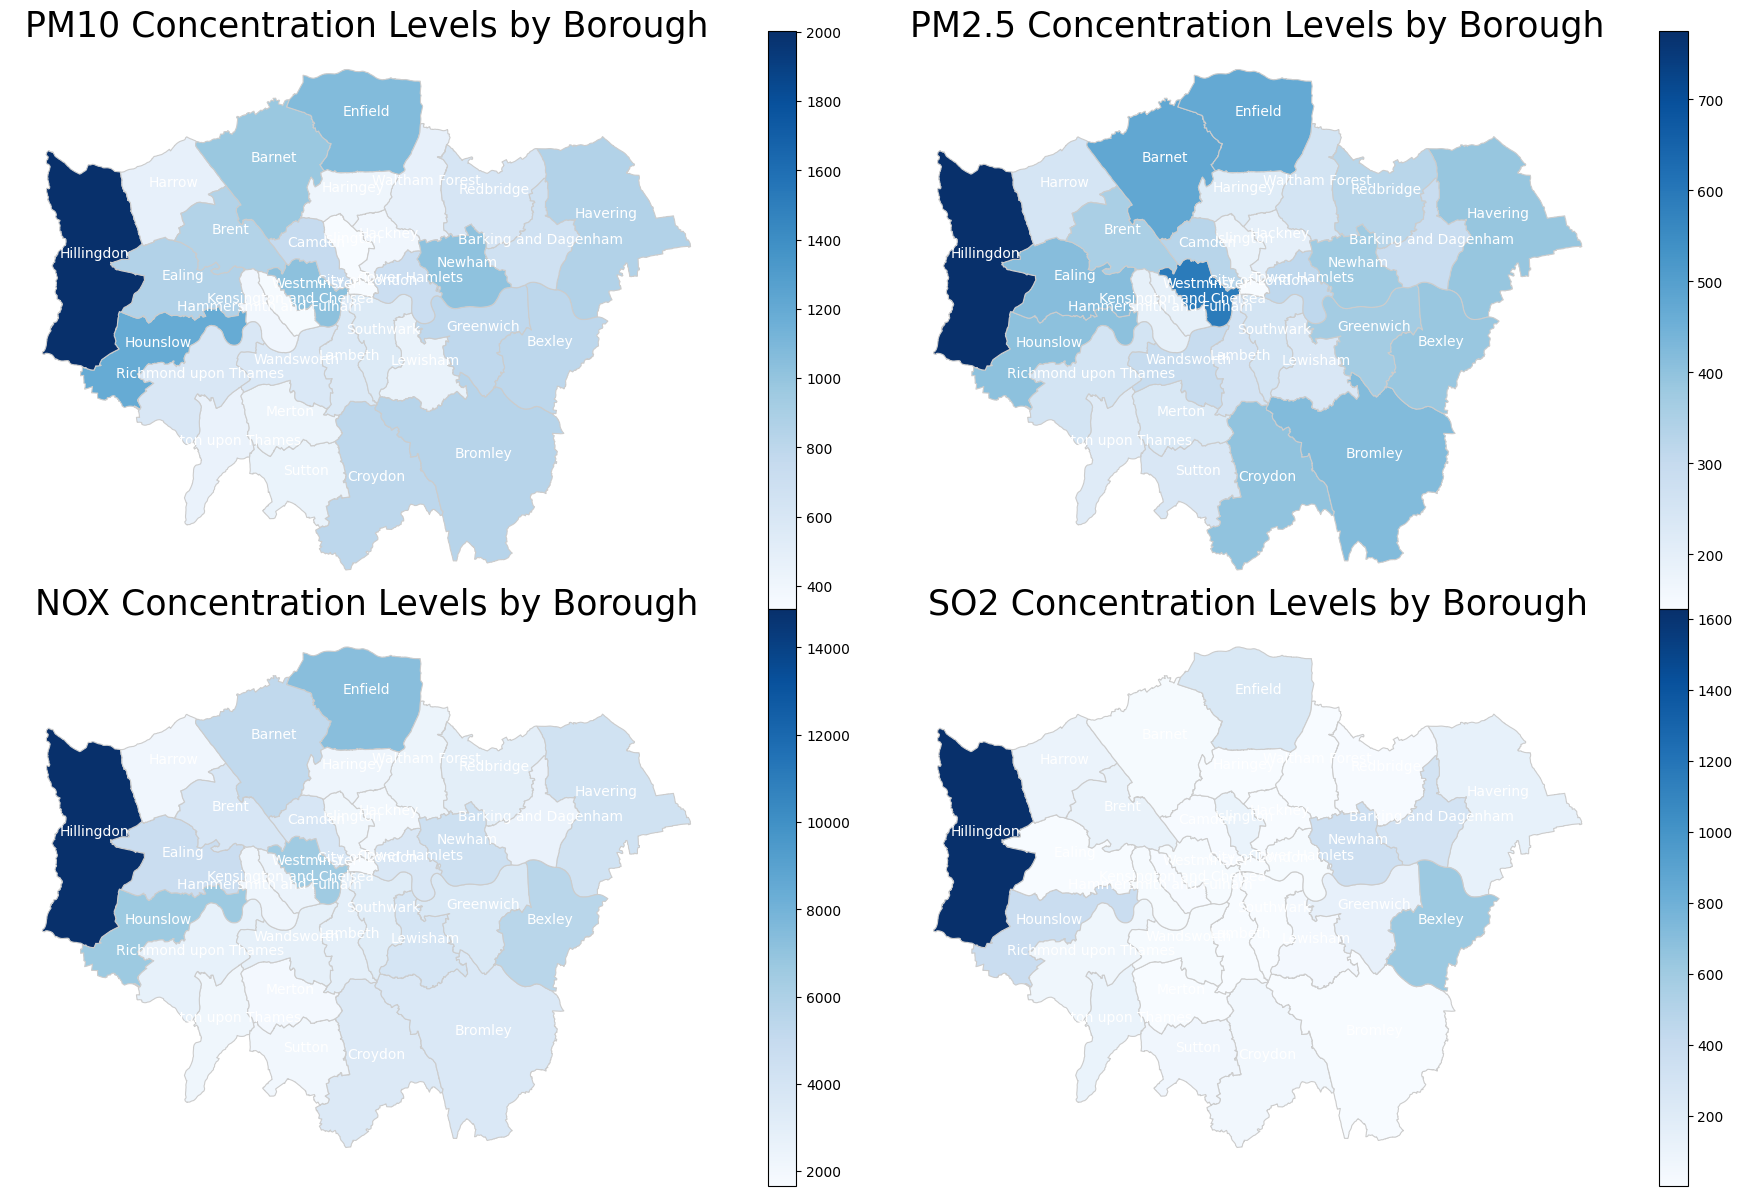

In [ ]:

# Select relevant columns from the DataFrame
columns = [ 'Borough', 'pm10', 'pm2.5', 'nox', 'so2']
subset_df = br_df_grp[columns]

# Merge the spatial data with the subset of the DataFrame based on the 'Borough' column
merged_data = map_df.merge(subset_df, on='Borough')

# Generate the geospatial plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(23,15))

ax_all = [ax1, ax2, ax3, ax4]

for i in range(len(ax_all)):
  merged_data.plot(column=columns[i+1], cmap='Blues', linewidth=0.8, ax=ax_all[i], edgecolor='0.8', legend=True)


# Add annotations for borough names to each subplot
for ax in ax_all:
    for x, y, label in zip(merged_data.geometry.centroid.x, merged_data.geometry.centroid.y, merged_data['Borough']):
        ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, ha='center',color='white')

# Set titles for each subplot
ax1.set_title('PM10 Concentration Levels by Borough', fontsize=25)
ax2.set_title('PM2.5 Concentration Levels by Borough', fontsize=25)
ax3.set_title('NOX Concentration Levels by Borough', fontsize=25)
ax4.set_title('SO2 Concentration Levels by Borough', fontsize=25)

ax1.tick_params(labelsize=20)

# Turn off axis for each subplot
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_axis_off()

# Adjust spacing between subplots for inner figure size
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()